# Determination of the precision [nm]
### Johanna Rahm, Sebastian Malkusch
#### Research group Heilemann
#### Institute for Physical and Theoretical Chemistry, Goethe University Frankfurt a.M.

In thunderSTORM the localization uncertainty is calculared by Thompson et al. Biophys. J. 2002 and Quan et al. J. Biomed. Opt. 2010 formula.<br/>
rapidSTORM calculates the localization uncertainty based on Thompson et al. Biophys. J. 2002. The mean value is build for the x/y-plane respectively.

## Choose a localization software

In [1]:
from pySPT.widgets import widgetDirectoryStructure
from pySPT.widgets import widgetColumnSort
from pySPT.widgets import widgetPrecision
from pySPT.preAnalysis import precision
widget_precision = widgetPrecision.WidgetPrecision()
display(widget_precision.software_button)

RadioButtons(options=('ThunderSTORM', 'rapidSTORM'), value='ThunderSTORM')

## Load file

thunderSTORM: Insert the full file path of the thunderSTORM exported results table with .csv ending or browse for it. Make sure that the uncertainty is represented in nm. (Example path: F:\resting\160404_CS5\cell05.csv) <br/>
rapidSTORM: Insert the full file path of the rapidSTORM localization file with .txt ending or browse for it. (Example path: F:\resting\160404_CS5\cell05.txt) 

In [2]:
widget_dir_structure = widgetDirectoryStructure.WidgetDirStructure()
precision = precision.Precision()
display(widget_precision.file_text_box, widget_precision.file_button)
widget_precision.file_button.on_click(widget_precision.open_file)
widget_precision.file_text_box.observe(widget_precision.change_file_box)

Text(value='', description='Complete path', placeholder='insert path', style=DescriptionStyle(description_widt…

Button(description='browse', style=ButtonStyle(), tooltip='browse for file')

## Run analysis

The uncertainties are ln-transformed and fitted with a Gauss-fit (to visually check for a normal distribution). The retransformed mean value of the ln(uncertainties) represents the mean position uncertainty in the x/y-plane.

Button(description='run', style=ButtonStyle(), tooltip='run the analysis')

fit 20.88103345919231
The mean localization uncertainty is 22.498 nm in x and 21.857 nm in y direction.


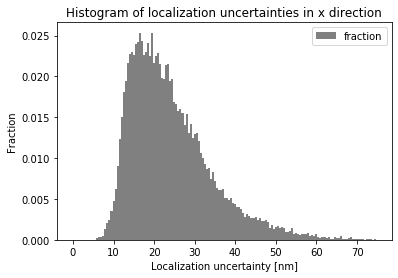

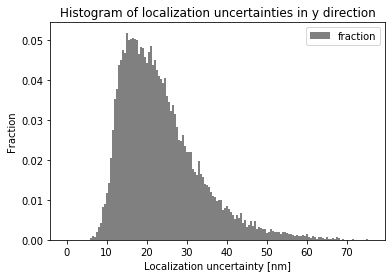

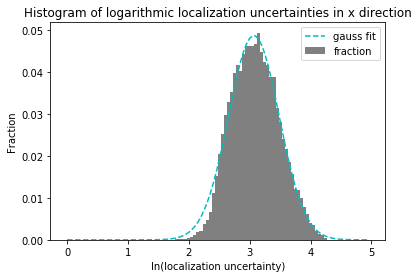

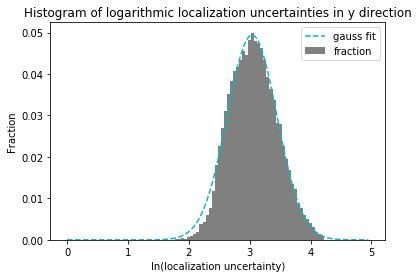

In [3]:
display(widget_precision.run_button)
def run_analysis(event):
    widget_precision.create_clear_output()
    display(widget_precision.run_button)
    if widget_precision.got_file_name:
        if widget_precision.software_button.value == "ThunderSTORM":
            widget_column_sort = widgetColumnSort.WidgetColumnSort(widget_precision.file_text_box.value, "ThunderSTORM", ['"uncertainty_xy [nm]"'])
            precision.software = widget_precision.software_button.value
        elif widget_precision.software_button.value == "rapidSTORM":
            widget_column_sort = widgetColumnSort.WidgetColumnSort(widget_precision.file_text_box.value, "rapidSTORM", ['"Position-0-0-uncertainty"', '"Position-1-0-uncertainty"'])
            precision.software = widget_precision.software_button.value
        widget_column_sort.check_header()
        if widget_column_sort.correct_header:
            widget_column_sort.run_column_sort()
            precision.file_name = widget_precision.file_text_box.value
            precision.column_order = widget_column_sort.column_order
            precision.run_precision()
        else:
            widget_precision.warning_wrong_file()
    else:
        widget_precision.warning_wrong_file_path()
widget_precision.run_button.on_click(run_analysis)

## Save

The results will be saved in .txt files (one for each histogram and one for the localization precision). <br/>
For the HMM-analysis, a microscope.txt file with the camera pixel size [nm], integration time [s] and localization uncertainty [nm] is needed. If you want to save this file with a static localization error, check the box. 

In [4]:
display(widget_precision.save_figures_checkbox, widget_precision.check_microscope, widget_precision.camera_pixel_size_box, widget_precision.camera_integration_time_box, widget_precision.save_button)
def save_analysis(event):
    widget_precision.create_clear_output()
    display(widget_precision.save_figures_checkbox, widget_precision.check_microscope, widget_precision.camera_pixel_size_box, widget_precision.camera_integration_time_box, widget_precision.save_button)
    widget_dir_structure.name_handling(widget_precision.file_text_box.value)
    widget_dir_structure.create_raw_base_name()
    widget_dir_structure.sub_folder = "\\preAnalysis"
    widget_dir_structure.create_folder()
    precision.save_precision(widget_dir_structure.sub_folder_dir, widget_dir_structure.raw_base_name)
    if widget_precision.save_figures_checkbox.value:
        precision.run_save_plots(widget_dir_structure.sub_folder_dir, widget_dir_structure.raw_base_name)
    if widget_precision.check_microscope.value:
        precision.save_hmm_microscope(widget_dir_structure.sub_folder_dir, widget_precision.camera_pixel_size_box.value, widget_precision.camera_integration_time_box.value)
widget_precision.save_button.on_click(save_analysis)

Checkbox(value=True, description='Save plots')

Checkbox(value=False, description='Save microscope file for HMM analysis?')

Text(value='158', description='Pixel size [nm]', placeholder='Type something', style=DescriptionStyle(descript…

Text(value='0.02', description='Camera integration time [s]', placeholder='Type something', style=DescriptionS…

Button(description='save', style=ButtonStyle(), tooltip='save the results')